In [1]:
import pandas as pd
import warnings
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
warnings.simplefilter('ignore', pd.errors.DtypeWarning)

sys.path.append('/sise/home/shakarch/muscle-formation-regeneration')
sys.path.append(os.path.abspath('..'))
from TimeSeriesAnalysis.utils.data_load_save import *

In [6]:
path = fr'/storage/users/assafzar/Muscle_Differentiation_AvinoamLab/data/mastodon/{params.registration_method}'

s1_df, s1_track_list = get_tracks(path + f"S{1} all detections.csv", manual_tagged_list=True)
s2_df, s2_track_list = get_tracks(path + f"S{2} all detections.csv", manual_tagged_list=True)
s3_df, s3_track_list = get_tracks(path + f"S{3} all detections.csv", manual_tagged_list=True)
s5_df, s5_track_list = get_tracks(path + f"S{5} all detections.csv", manual_tagged_list=True)

s6_df, s6_track_list = get_tracks(path + f"S{6} all detections.csv", manual_tagged_list=True)
s8_df, s8_track_list = get_tracks(path + f"S{8} all detections.csv", manual_tagged_list=True)


/sise/home/shakarch/muscle-formation-regeneration/TimeSeriesAnalysis/utils/data_load_save.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(chunk)
/sise/home/shakarch/muscle-formation-regeneration/TimeSeriesAnalysis/utils/data_load_save.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(chunk)
/sise/home/shakarch/muscle-formation-regeneration/TimeSeriesAnalysis/utils/data_load_save.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(chunk)
/sise/home/shakarch/muscle-formation-regeneration/TimeSeriesAnalysis/utils/data_load_save.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = d

In [3]:
def plot_tracked_cells_pie_chart(dfs_list,data_names_list, title, manual=True):
    
    def absolute_value(val):
        sizes = np.array(list(tracked_cells_dict.values())).sum()
        a  = np.round(val/100*sizes, 0)
        return a

    tracked_cells_dict = {}
    for df, vid_num in zip(dfs_list, data_names_list):
        if manual:
            df = df[df["manual"]==1]
        n_tracked_cells = len(df["Spot track ID"].unique())
        tracked_cells_dict[vid_num] = n_tracked_cells
        
    plt.pie(tracked_cells_dict.values(), labels=tracked_cells_dict.keys(), autopct=absolute_value)
    plt.title(title)
    plt.show()

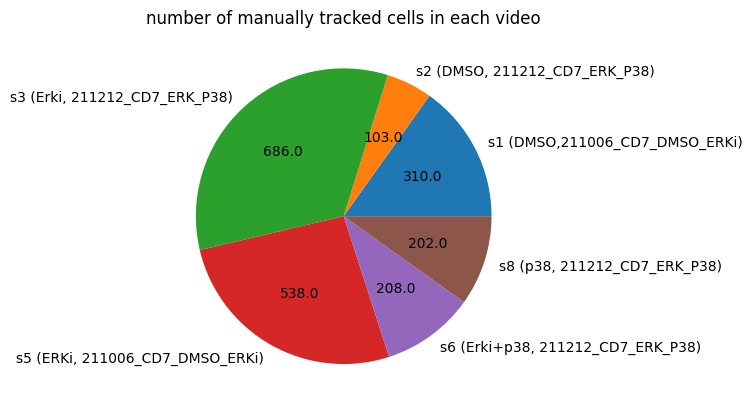

In [4]:
plot_tracked_cells_pie_chart([s1_df,s2_df,s3_df,s5_df,s6_df,s8_df],
                             ["s1 (DMSO,211006_CD7_DMSO_ERKi)",
                              "s2 (DMSO, 211212_CD7_ERK_P38)",
                              "s3 (Erki, 211212_CD7_ERK_P38)",
                              "s5 (ERKi, 211006_CD7_DMSO_ERKi)", 
                              "s6 (Erki+p38, 211212_CD7_ERK_P38)", 
                              "s8 (p38, 211212_CD7_ERK_P38)"], 
                             title="number of manually tracked cells in each video", manual=True)

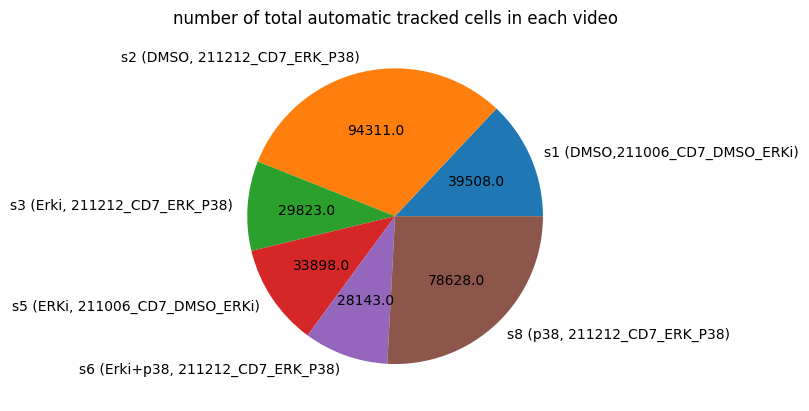

In [5]:
plot_tracked_cells_pie_chart([s1_df,s2_df,s3_df,s5_df,s6_df,s8_df],
                            ["s1 (DMSO,211006_CD7_DMSO_ERKi)",
                              "s2 (DMSO, 211212_CD7_ERK_P38)",
                              "s3 (Erki, 211212_CD7_ERK_P38)",
                              "s5 (ERKi, 211006_CD7_DMSO_ERKi)", 
                              "s6 (Erki+p38, 211212_CD7_ERK_P38)", 
                              "s8 (p38, 211212_CD7_ERK_P38)"], 
                            title="number of total automatic tracked cells in each video", manual=False)

In [6]:
def plot_n_cells_over_time(df, color, title):
    df = df.sort_values("Spot frame")
    counts = df[df["manual"]==1].groupby('Spot frame')["Spot track ID"].count()
    plt.bar(counts.index * 5 / 60, counts, color=color, label="counts")

    mean_count = counts.mean()
    plt.axhline(mean_count, linestyle='dashed', color="gray",label='mean_counts r= %0.1f' % mean_count)
    # plt.plot(counts.index * 5 / 60, [mean_count for i in range(len(counts))], linestyle='dashed', color="gray", label="mean_counts")
    
    plt.legend()
    plt.xlabel("time (hours)")
    plt.ylabel("counts")
    plt.title(title)
    plt.ylim(0,650)
    plt.show()

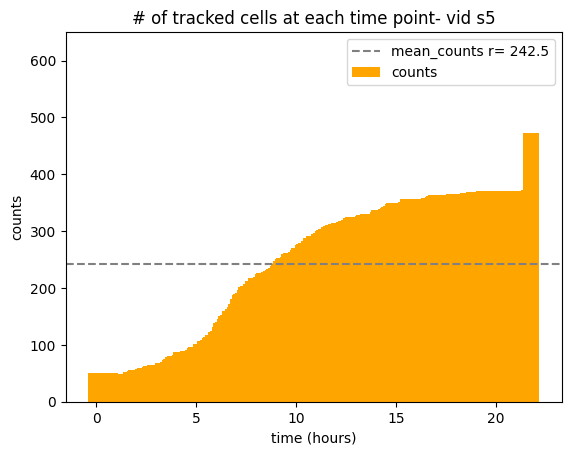

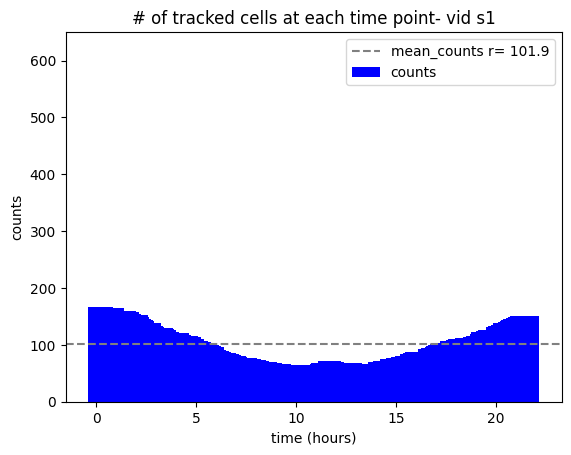

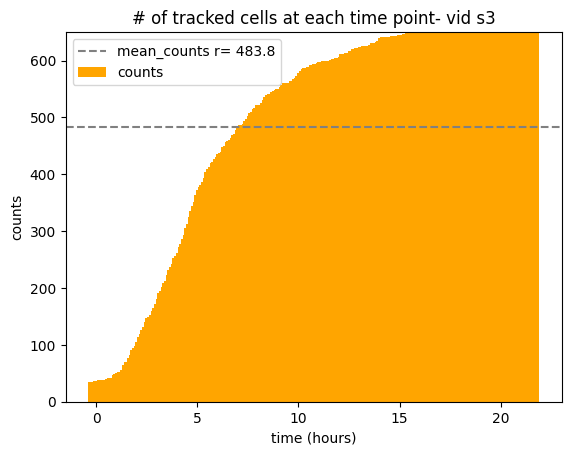

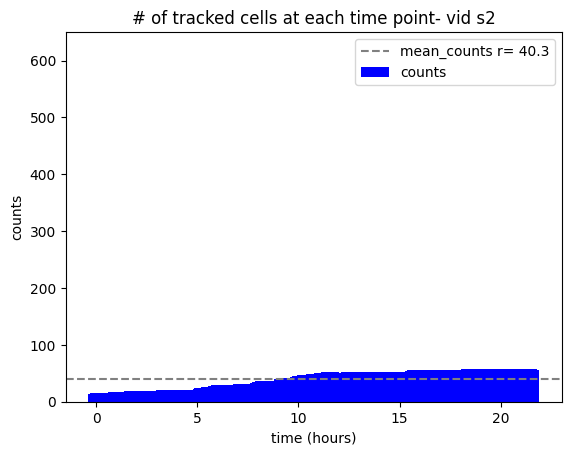

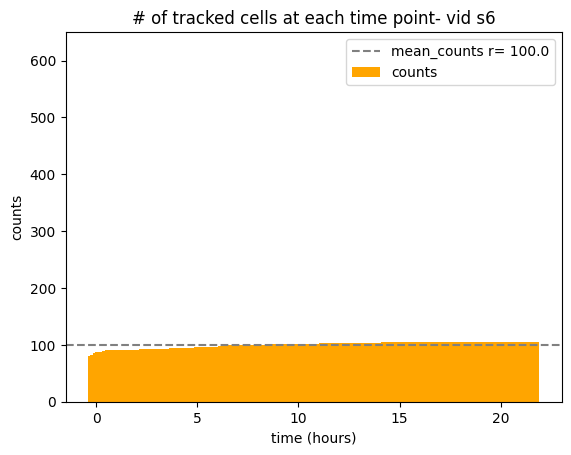

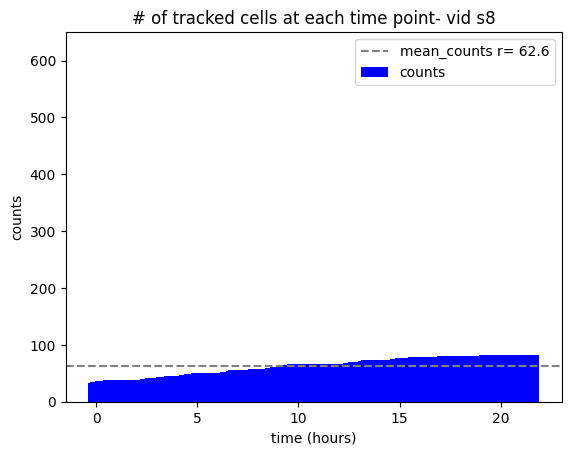

In [7]:
plot_n_cells_over_time(s5_df, "orange", "# of tracked cells at each time point- vid s5")
plot_n_cells_over_time(s1_df, "blue", "# of tracked cells at each time point- vid s1")

plot_n_cells_over_time(s3_df, "orange", "# of tracked cells at each time point- vid s3")
plot_n_cells_over_time(s2_df, "blue", "# of tracked cells at each time point- vid s2")

plot_n_cells_over_time(s6_df, "orange", "# of tracked cells at each time point- vid s6")
plot_n_cells_over_time(s8_df, "blue", "# of tracked cells at each time point- vid s8")

In [8]:
def plot_track_length(df, color, title):
    counts = df[df["manual"]==1].groupby('Spot track ID')["Spot frame"].count()
    sns.distplot(counts, hist=True, kde=False, bins=int(180/5), color=color ,hist_kws={'edgecolor':'black'}, label="counts")
    
    mean_count = counts.mean()
    plt.axvline(x=mean_count, linestyle='dashed', color="gray", label='mean_length= %0.1f' % mean_count)
    
    plt.xlim(30,260)
    plt.legend()
    plt.xlabel("track length")
    plt.ylabel("count")
    plt.title(title)
    plt.show()

/home/shakarch/.conda/envs/tf-env-new/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


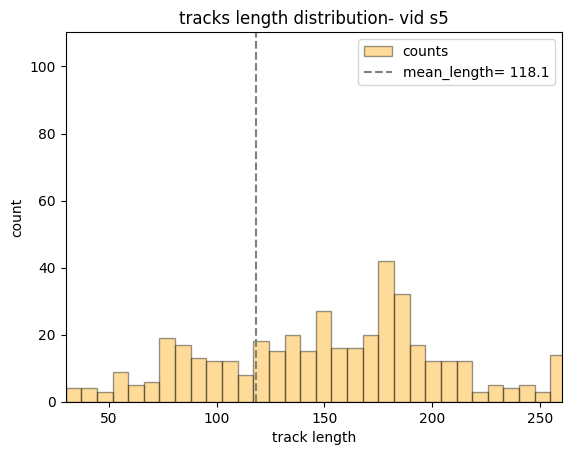

/home/shakarch/.conda/envs/tf-env-new/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


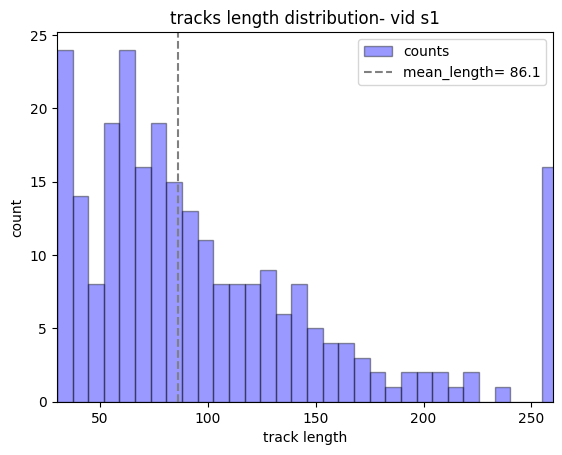

/home/shakarch/.conda/envs/tf-env-new/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


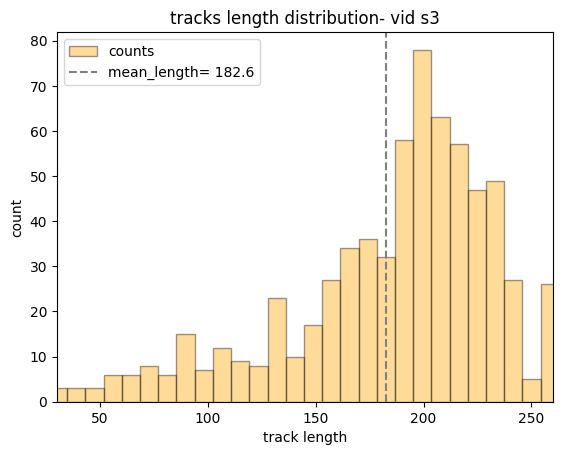

/home/shakarch/.conda/envs/tf-env-new/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


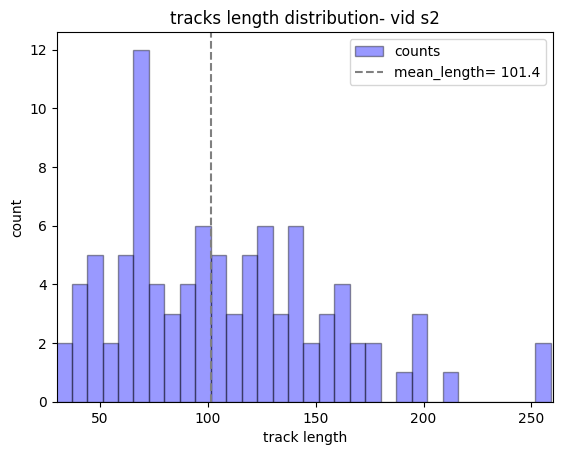

/home/shakarch/.conda/envs/tf-env-new/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


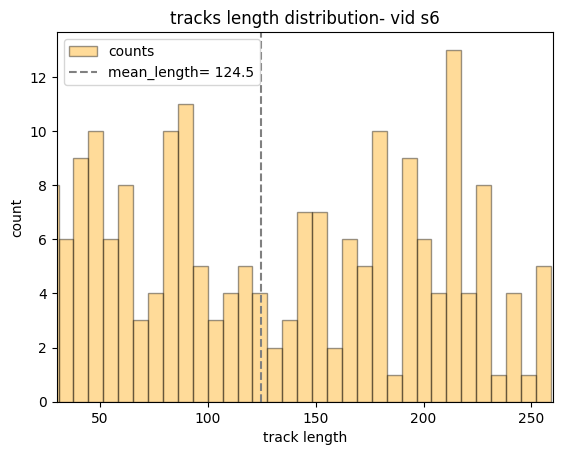

/home/shakarch/.conda/envs/tf-env-new/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


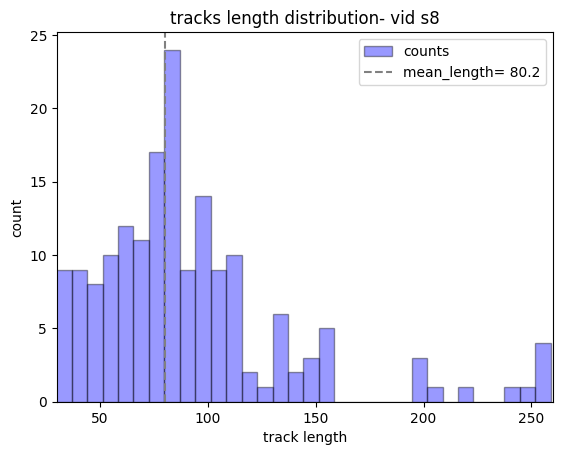

In [9]:
plot_track_length(s5_df, color="orange", title="tracks length distribution- vid s5")
plot_track_length(s1_df, color="blue", title="tracks length distribution- vid s1")
plot_track_length(s3_df, color="orange", title="tracks length distribution- vid s3")
plot_track_length(s2_df, color="blue", title="tracks length distribution- vid s2")

plot_track_length(s6_df, color="orange", title="tracks length distribution- vid s6")
plot_track_length(s8_df, color="blue", title="tracks length distribution- vid s8")

In [ ]:
def get_density(df, vid_name):
    densities = pd.DataFrame()
    for t, t_df in df.groupby("Spot frame"):
        densities = densities.append({"Spot frame":int(t)*5/60, "density":len(t_df)}, ignore_index=True)
    densities["vid_name"] = vid_name
    return densities

all_densities = pd.concat([get_density(s1_df, "s1"), get_density(s2_df, "s2"), get_density(s3_df, "s3"), get_density(s5_df,"s5"), get_density(s6_df,"s6"), get_density(s8_df,"s8")],)

In [ ]:
def plot_density_over_time(manual=False):
    fig = plt.figure(figsize=(10, 8))
    
    def plot_density(df, experiment, color, label, manual):
        if manual:
            df = df[df["manual"]==1]
        densities = pd.DataFrame()
        for t, t_df in df.groupby("Spot frame"):
            densities = densities.append({"Spot frame":int(t)*5/60, "density":len(t_df)}, ignore_index=True)
        densities["experiment"] = experiment

        sns.scatterplot(data=densities, x="Spot frame", y="density", color=color, label=label)
        return densities

    plot_density(s1_df, "s1", "darkblue", "s1 (DMSO, 211006_CD7_DMSO_ERKi)", manual)
    plot_density(s2_df, "s2", "royalblue", "s2 (DMSO, 211212_CD7_ERK_P38)", manual)
    plot_density(s5_df, "s5", "darkorange", "s3 (Erki, 211212_CD7_ERK_P38)", manual)
    plot_density(s3_df, "s3", "orangered", "s5 (ERKi, 211006_CD7_DMSO_ERKi)", manual)
    plot_density(s6_df, "s6", "pink", "s6 (Erki+p38, 211212_CD7_ERK_P38)", manual)
    plot_density(s8_df, "s8", "green", "s8 (p38, 211212_CD7_ERK_P38)", manual)
    
    title = "# cells over time - manual tracking" if manual else "# cells over time - automated tracking"
    plt.title(title)
    plt.xlabel("time (hours)")
    plt.legend()
    plt.show()

plot_density_over_time(manual=False)
plot_density_over_time(manual=True)

Check how much data samples we have for training & testing

In [2]:
from TimeSeriesAnalysis.build_models_on_transformed_tracks import get_to_run, prep_data

diff_df_train, con_df_train, con_df_test, diff_df_test = get_to_run(path=consts.storage_path, modality="motility", feature_type="window_size_arr", local_density=False,specific_feature_type= 16, win_size=16,
                                                           con_train_num=1, diff_train_num=5,
                                                           con_test_num=2, diff_test_num=3)

/home/shakarch/.conda/envs/tf-env-new/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/shakarch/.conda/envs/tf-env-new/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/shakarch/.conda/envs/tf-env-new/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


read data from video number 5
diff train len (47819, 1580)
read data from video number 1
con_df_train len (16636, 1580)
read data from video number 2
read data from video number 3


In [4]:
_, _, x_test, y_train, y_test = load_data(consts.motility_model_path%(1,5), load_clf=False, load_x_train=False, load_x_test=True, load_y_train=True, load_y_test=True)

In [5]:
x_test.drop(columns=["Spot track ID", "Spot frame", ])

,Spot track ID,"Spot position Y__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.0","Spot position X__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.0","Spot position Y__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.2","Spot position Y__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","Spot position Y__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4","Spot position X__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.2","Spot position X__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","Spot position Y__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.6","Spot position X__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4",...,Spot position Y__index_mass_quantile__q_0.9,Spot position X__energy_ratio_by_chunks__num_segments_10__segment_focus_9,Spot position X__index_mass_quantile__q_0.7,Spot position Y__partial_autocorrelation__lag_9,"Spot position Y__fft_coefficient__attr_""abs""__coeff_2","Spot position Y__augmented_dickey_fuller__attr_""teststat""__autolag_""AIC""",Spot position Y__energy_ratio_by_chunks__num_segments_10__segment_focus_0,"Spot position Y__augmented_dickey_fuller__attr_""pvalue""__autolag_""AIC""",Spot position Y__energy_ratio_by_chunks__num_segments_10__segment_focus_8,Spot position X__maximum
0,123362,16.771345,9.353710,18.307120,9.950288,18.361870,7.850681,6.899094,19.265680,9.324321,...,0.900000,0.031879,0.600000,0.010209,124.279480,-3.878242,0.011358,0.002201,0.081568,0.000000
1,9545,4.161655,0.470194,5.074928,4.665949,5.350017,0.413007,0.557174,1.513663,0.170268,...,0.966667,0.380717,0.900000,0.011038,124.686500,1.130861,0.000618,0.995472,0.304879,16.586090
2,8681,1.797534,5.126241,1.214454,1.806342,1.254389,6.088687,5.791056,1.486329,6.102138,...,0.966667,0.015991,0.500000,-0.181764,135.559620,-1.760859,0.000016,0.400060,0.205386,25.863830
3,123350,18.665462,25.783587,19.039772,18.919231,21.730978,31.632372,15.362176,18.437033,28.238733,...,0.966667,0.153902,0.800000,7.486381,141.937650,-1.841663,0.000198,0.359982,0.264101,112.330505
4,8098,2.832854,0.611160,3.247592,2.211655,2.794688,0.461374,0.670592,0.615389,0.428748,...,0.933333,0.283970,0.866667,0.036185,147.957320,-2.357314,0.001724,0.154148,0.153148,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,7743,5.195406,4.091228,5.605625,6.046802,5.944321,4.921656,4.658448,1.798245,2.631071,...,0.966667,0.279271,0.866667,-0.107092,226.545100,-0.102461,0.000565,0.949193,0.253636,60.429140
753,23414,1.008002,9.893298,1.058359,0.761180,0.573320,10.874116,12.363544,0.476480,10.502267,...,0.966667,0.027845,0.566667,-0.113163,102.826324,-2.339355,0.000216,0.159589,0.206356,33.890625
754,17610,1.387123,3.398480,1.237000,1.061904,0.962496,2.317023,2.731426,0.828148,2.898566,...,0.933333,0.298481,0.866667,-0.063386,33.189380,-2.606880,0.005845,0.091584,0.105338,0.120850
755,6472,0.241882,1.181644,0.254049,0.218132,0.288733,0.996656,1.308491,0.352347,0.656763,...,0.966667,0.327168,0.866667,-0.177405,43.266070,-0.282534,0.002780,0.927942,0.228087,29.364029


In [7]:
print("num of trucked cells s5 training before filtrting: ", len(s5_df[s5_df["manual"]==1]["Spot track ID"].unique()))
print("num of trucked cells s1 training before filtrting: ", len(s1_df[s1_df["manual"]==1]["Spot track ID"].unique()))

print("num of trucked cells s5 training after filtrting: ", diff_df_train["Spot track ID"].nunique())
print("num of trucked cells s1 training after filtrting: ", con_df_train["Spot track ID"].nunique())
print("num of temporal segments s5 after filtrting: ",  diff_df_train["Spot track ID"].shape)
print("num of temporal segments s1 after filtrting: ",  con_df_train["Spot track ID"].shape)

print("um of temporal segments for training:")
print(y_train["target"].value_counts())

num of trucked cells s5 training before filtrting:  538
num of trucked cells s1 training before filtrting:  310
num of trucked cells s5 training after filtrting:  420
num of trucked cells s1 training after filtrting:  249
num of temporal segments s5 after filtrting:  (47819,)
num of temporal segments s1 after filtrting:  (16636,)
um of temporal segments for training:
False    468
True     268
Name: target, dtype: int64


In [8]:
print("num of trucked cells s3 test before filtrting: ", len(s3_df[s3_df["manual"]==1]["Spot track ID"].unique()))
print("num of trucked cells s2 test before filtrting: ", len(s2_df[s2_df["manual"]==1]["Spot track ID"].unique()))

print("num of trucked cells s3 test after filtrting: ", diff_df_test["Spot track ID"].nunique())
print("num of trucked cells s2 test after filtrting: ", con_df_test["Spot track ID"].nunique())
print("num of temporal segments s3 after filtrting: ",  diff_df_test["Spot track ID"].shape)
print("num of temporal segments s2 after filtrting: ",  con_df_test["Spot track ID"].shape)

print("um of temporal segments for test:")
print(y_test["target"].value_counts())

num of trucked cells s3 test before filtrting:  686
num of trucked cells s2 test before filtrting:  103
num of trucked cells s3 test after filtrting:  675
num of trucked cells s2 test after filtrting:  95
num of temporal segments s3 after filtrting:  (102929,)
num of temporal segments s2 after filtrting:  (7214,)
um of temporal segments for test:
True     577
False    180
Name: target, dtype: int64


In [ ]:
diff_df_test["Spot track ID"].nunique(), diff_df_test[diff_df_test["Spot frame"] == 160].shape  

In [ ]:
# con_df_train["Spot track ID"].nunique(), con_df_test["Spot track ID"].nunique()

In [ ]:
diff_df_train